In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [22]:
def myDespine(ax):
    """Remove right and top lines on plots.
    """
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)


In [42]:
# from fernando with original marking of accept/reject
path = '/home/cudmore/Sites/SanPy/rabbit-molar-jan-18-2022/kymSummary-jan-18-fs.xls'

# after i appended fernando accept/reject
# new version including clip window [0, 0.8]
path = '/home/cudmore/Sites/SanPy/rabbit-molar-jan-18-2022/kymSummary-jan-18.csv'

saveFolder = os.path.split(path)[0]
saveName = os.path.basename(path)
saveName = os.path.splitext(saveName)[0]
print(saveName)

if path.endswith('.xls'):
    df = pd.read_excel(path)
elif path.endswith('csv'):
    df = pd.read_csv(path)
    
display(df)

kymSummary-jan-18


,Unnamed: 0,saveFolder,convertToMolar,condition,mvThreshold,meanPeak,meanPeakTime,varPeak,varPeakTime,var_at_meanPeakTime,percentChangeInPeakVal,numSpikes,file,kd,caRest,startMetaSec,stopMetaSec,LFS eval
0,0,rabbit-molar-jan-18-2022,True,Control,2.56,928.242929,0.134010,7725.409668,0.030631,2822.976213,98.0,5,1Hz_ctrl.tif,1200,125,0,0.8,Reject
1,1,rabbit-molar-jan-18-2022,True,Control,1.44,299.945916,0.303038,2815.094029,0.130475,1578.325445,83.0,9,1Hz_ctrl_0001.tif,1200,125,0,0.8,Reject
2,2,rabbit-molar-jan-18-2022,True,Control,1.28,269.857815,0.461037,334.507705,0.115259,98.409116,107.0,11,2.5Hz_ctrl_0004.tif,1200,125,0,0.8,Reject
3,3,rabbit-molar-jan-18-2022,True,Control,1.50,486.712215,0.102839,585.903737,0.072368,518.832736,89.0,13,2.5Hz_ctrl_0005.tif,1200,125,0,0.8,Accept
4,4,rabbit-molar-jan-18-2022,True,Control,1.41,463.911191,0.180896,661.554697,0.246327,483.417085,87.0,14,2.5Hz_ctrl_0006.tif,1200,125,0,0.8,Reject
5,5,rabbit-molar-jan-18-2022,True,Control,1.30,337.371614,0.223376,549.787194,0.063822,133.314811,98.0,13,2.5Hz_ctrl_0007.tif,1200,125,0,0.8,Reject
6,6,rabbit-molar-jan-18-2022,True,Control,1.51,454.821500,0.245415,1378.027156,0.061354,121.520823,93.0,8,2.5Hz_ctrl_0009.tif,1200,125,0,0.8,Accept
7,7,rabbit-molar-jan-18-2022,True,Control,1.60,393.214309,0.176647,701.728972,0.088323,306.618431,94.0,7,2.5Hz_ctrl_0010.tif,1200,125,0,0.8,Reject
8,8,rabbit-molar-jan-18-2022,True,Control,1.80,520.605727,0.254076,14589.893446,0.070359,2370.375055,94.0,7,2.5Hz_ctrl_0011.tif,1200,125,0,0.8,Reject
9,9,rabbit-molar-jan-18-2022,True,Control,1.41,482.975037,0.168767,1053.028099,0.062371,852.222657,84.0,13,2.5Hz_ctrl_0012.tif,1200,125,0,0.8,Accept


In [43]:
# remove rows where column 'LFS eval' is 'Reject'

dfPlot = df[ df['LFS eval']=='Accept']

In [44]:
aggList = ['count', 'min', 'max', 'mean', 'median', 'std', 'sem']

dfStats = dfPlot.groupby('condition')['varPeak'].agg(aggList)

display(dfStats)

,count,min,max,mean,median,std,sem
condition,,,,,,,
Control,5,214.641391,1378.027156,722.488871,585.903737,482.771277,215.901879
TG,1,18.968786,18.968786,18.968786,18.968786,NaN,NaN


<AxesSubplot:xlabel='condition', ylabel='varPeak'>

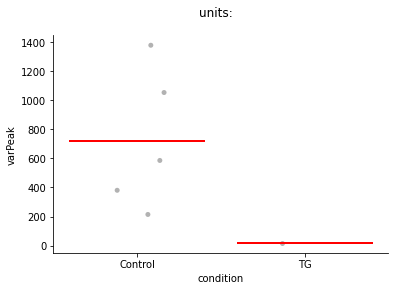

In [45]:
 convertMolarStr = ''

figVar, axsVar = plt.subplots(1, 1, sharex=False, figsize=(6, 4))
figVar.suptitle(f'units:{convertMolarStr}')
axsVar = [axsVar]
myDespine(axsVar[0])

sns.stripplot(x='condition',
    y='varPeak',
    data=dfPlot,
    alpha=0.3,
    jitter=0.2,
    color='k',
    ax=axsVar[0]);

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'r', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="condition",
            y="varPeak",
            data=dfPlot,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=axsVar[0])


In [46]:
#
saveVarFigFile = saveName + '.jpg'  # 'pooledVar-20220205.jpg'
saveVarFigPath = os.path.join(saveFolder, saveVarFigFile)
print(f'saving saveVarFigPath: {saveVarFigPath}')
figVar.savefig(saveVarFigPath, dpi=300)


saving saveVarFigPath: /home/cudmore/Sites/SanPy/rabbit-molar-jan-18-2022/kymSummary-jan-18.jpg
